In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
import keras
import keras.backend as k
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop(['Id'], axis='columns')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
le = LabelEncoder()
data.Species = le.fit_transform(data.Species)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.isnull().values.any()

False

Text(0.5, 1.0, 'count plot')

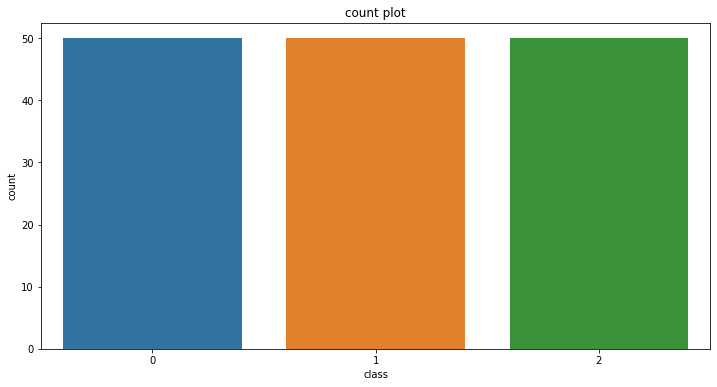

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Species', data=data)
plt.xlabel('class')
plt.ylabel('count')
plt.title('count plot')

In [19]:
print('hello')

hello


Text(0.5, 1, 'correlation matrix')

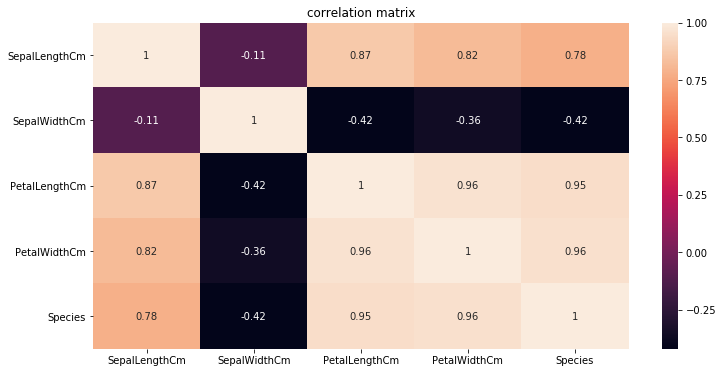

In [8]:
cormat = data.corr()
top_index = cormat.index
plt.figure(figsize=(12,6))
sns.heatmap(data[top_index].corr(), annot=True)
plt.title('correlation matrix')

In [9]:
features = data.iloc[:,0:4].values
target = data.iloc[:,4].values

In [11]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [20]:
model = Sequential()
model.add(Dense(15, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [21]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, shuffle=True, epochs=1000, validation_split=0.15, verbose=2)

Train on 95 samples, validate on 17 samples
Epoch 1/1000
 - 0s - loss: 1.2119 - accuracy: 0.0316 - val_loss: 1.1196 - val_accuracy: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 1.1621 - accuracy: 0.1053 - val_loss: 1.1175 - val_accuracy: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 1.1823 - accuracy: 0.0211 - val_loss: 1.1153 - val_accuracy: 0.0000e+00
Epoch 4/1000
 - 0s - loss: 1.1713 - accuracy: 0.0316 - val_loss: 1.1130 - val_accuracy: 0.0000e+00
Epoch 5/1000
 - 0s - loss: 1.1525 - accuracy: 0.0526 - val_loss: 1.1108 - val_accuracy: 0.0000e+00
Epoch 6/1000
 - 0s - loss: 1.1680 - accuracy: 0.0632 - val_loss: 1.1086 - val_accuracy: 0.0000e+00
Epoch 7/1000
 - 0s - loss: 1.1553 - accuracy: 0.0632 - val_loss: 1.1065 - val_accuracy: 0.0000e+00
Epoch 8/1000
 - 0s - loss: 1.1644 - accuracy: 0.0421 - val_loss: 1.1044 - val_accuracy: 0.0000e+00
Epoch 9/1000
 - 0s - loss: 1.1491 - accuracy: 0.0526 - val_loss: 1.1023 - val_accuracy: 0.0000e+00
Epoch 10/1000
 - 0s - loss: 1.1521 - accuracy: 0.0421 - val_loss:

Epoch 86/1000
 - 0s - loss: 1.1201 - accuracy: 0.2526 - val_loss: 1.0752 - val_accuracy: 0.4118
Epoch 87/1000
 - 0s - loss: 1.1062 - accuracy: 0.3053 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 88/1000
 - 0s - loss: 1.0966 - accuracy: 0.3579 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 89/1000
 - 0s - loss: 1.1008 - accuracy: 0.3263 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 90/1000
 - 0s - loss: 1.1029 - accuracy: 0.3158 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 91/1000
 - 0s - loss: 1.1126 - accuracy: 0.2842 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 92/1000
 - 0s - loss: 1.0901 - accuracy: 0.3789 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 93/1000
 - 0s - loss: 1.1089 - accuracy: 0.3263 - val_loss: 1.0751 - val_accuracy: 0.4118
Epoch 94/1000
 - 0s - loss: 1.0982 - accuracy: 0.3474 - val_loss: 1.0750 - val_accuracy: 0.4118
Epoch 95/1000
 - 0s - loss: 1.1105 - accuracy: 0.2842 - val_loss: 1.0750 - val_accuracy: 0.4118
Epoch 96/1000
 - 0s - loss: 1.0875 - acc

Epoch 171/1000
 - 0s - loss: 1.0936 - accuracy: 0.3158 - val_loss: 1.0735 - val_accuracy: 0.4118
Epoch 172/1000
 - 0s - loss: 1.0907 - accuracy: 0.3368 - val_loss: 1.0735 - val_accuracy: 0.4118
Epoch 173/1000
 - 0s - loss: 1.0964 - accuracy: 0.2947 - val_loss: 1.0735 - val_accuracy: 0.4118
Epoch 174/1000
 - 0s - loss: 1.0894 - accuracy: 0.3474 - val_loss: 1.0734 - val_accuracy: 0.4118
Epoch 175/1000
 - 0s - loss: 1.0773 - accuracy: 0.4105 - val_loss: 1.0734 - val_accuracy: 0.4118
Epoch 176/1000
 - 0s - loss: 1.0829 - accuracy: 0.3579 - val_loss: 1.0734 - val_accuracy: 0.4118
Epoch 177/1000
 - 0s - loss: 1.0919 - accuracy: 0.3263 - val_loss: 1.0733 - val_accuracy: 0.4118
Epoch 178/1000
 - 0s - loss: 1.0839 - accuracy: 0.3474 - val_loss: 1.0732 - val_accuracy: 0.4118
Epoch 179/1000
 - 0s - loss: 1.0920 - accuracy: 0.3368 - val_loss: 1.0732 - val_accuracy: 0.4118
Epoch 180/1000
 - 0s - loss: 1.0847 - accuracy: 0.3579 - val_loss: 1.0732 - val_accuracy: 0.4118
Epoch 181/1000
 - 0s - loss: 1

Epoch 255/1000
 - 0s - loss: 1.0843 - accuracy: 0.0737 - val_loss: 1.0677 - val_accuracy: 0.2353
Epoch 256/1000
 - 0s - loss: 1.0808 - accuracy: 0.0526 - val_loss: 1.0675 - val_accuracy: 0.2941
Epoch 257/1000
 - 0s - loss: 1.0677 - accuracy: 0.1368 - val_loss: 1.0673 - val_accuracy: 0.2941
Epoch 258/1000
 - 0s - loss: 1.0803 - accuracy: 0.0526 - val_loss: 1.0671 - val_accuracy: 0.2941
Epoch 259/1000
 - 0s - loss: 1.0875 - accuracy: 0.0842 - val_loss: 1.0669 - val_accuracy: 0.2941
Epoch 260/1000
 - 0s - loss: 1.0767 - accuracy: 0.1368 - val_loss: 1.0668 - val_accuracy: 0.3529
Epoch 261/1000
 - 0s - loss: 1.0730 - accuracy: 0.2000 - val_loss: 1.0666 - val_accuracy: 0.3529
Epoch 262/1000
 - 0s - loss: 1.0788 - accuracy: 0.2211 - val_loss: 1.0664 - val_accuracy: 0.3529
Epoch 263/1000
 - 0s - loss: 1.0740 - accuracy: 0.2632 - val_loss: 1.0662 - val_accuracy: 0.3529
Epoch 264/1000
 - 0s - loss: 1.0818 - accuracy: 0.2737 - val_loss: 1.0660 - val_accuracy: 0.3529
Epoch 265/1000
 - 0s - loss: 1

Epoch 340/1000
 - 0s - loss: 1.0551 - accuracy: 0.3895 - val_loss: 1.0434 - val_accuracy: 0.3529
Epoch 341/1000
 - 0s - loss: 1.0539 - accuracy: 0.4000 - val_loss: 1.0430 - val_accuracy: 0.3529
Epoch 342/1000
 - 0s - loss: 1.0536 - accuracy: 0.4000 - val_loss: 1.0427 - val_accuracy: 0.3529
Epoch 343/1000
 - 0s - loss: 1.0469 - accuracy: 0.3789 - val_loss: 1.0423 - val_accuracy: 0.3529
Epoch 344/1000
 - 0s - loss: 1.0550 - accuracy: 0.3684 - val_loss: 1.0418 - val_accuracy: 0.3529
Epoch 345/1000
 - 0s - loss: 1.0617 - accuracy: 0.3474 - val_loss: 1.0413 - val_accuracy: 0.3529
Epoch 346/1000
 - 0s - loss: 1.0459 - accuracy: 0.4316 - val_loss: 1.0410 - val_accuracy: 0.3529
Epoch 347/1000
 - 0s - loss: 1.0525 - accuracy: 0.3684 - val_loss: 1.0406 - val_accuracy: 0.3529
Epoch 348/1000
 - 0s - loss: 1.0519 - accuracy: 0.3895 - val_loss: 1.0401 - val_accuracy: 0.3529
Epoch 349/1000
 - 0s - loss: 1.0410 - accuracy: 0.4211 - val_loss: 1.0398 - val_accuracy: 0.3529
Epoch 350/1000
 - 0s - loss: 1

Epoch 425/1000
 - 0s - loss: 0.9928 - accuracy: 0.6105 - val_loss: 0.9784 - val_accuracy: 0.7647
Epoch 426/1000
 - 0s - loss: 1.0018 - accuracy: 0.5579 - val_loss: 0.9770 - val_accuracy: 0.7647
Epoch 427/1000
 - 0s - loss: 0.9914 - accuracy: 0.6000 - val_loss: 0.9757 - val_accuracy: 0.7647
Epoch 428/1000
 - 0s - loss: 0.9794 - accuracy: 0.6421 - val_loss: 0.9744 - val_accuracy: 0.7647
Epoch 429/1000
 - 0s - loss: 0.9819 - accuracy: 0.6737 - val_loss: 0.9731 - val_accuracy: 0.7647
Epoch 430/1000
 - 0s - loss: 0.9865 - accuracy: 0.6421 - val_loss: 0.9717 - val_accuracy: 0.7647
Epoch 431/1000
 - 0s - loss: 0.9713 - accuracy: 0.6842 - val_loss: 0.9704 - val_accuracy: 0.7647
Epoch 432/1000
 - 0s - loss: 0.9935 - accuracy: 0.5684 - val_loss: 0.9692 - val_accuracy: 0.7647
Epoch 433/1000
 - 0s - loss: 0.9958 - accuracy: 0.5684 - val_loss: 0.9677 - val_accuracy: 0.7647
Epoch 434/1000
 - 0s - loss: 0.9835 - accuracy: 0.6211 - val_loss: 0.9663 - val_accuracy: 0.7647
Epoch 435/1000
 - 0s - loss: 0

Epoch 510/1000
 - 0s - loss: 0.9010 - accuracy: 0.6211 - val_loss: 0.8394 - val_accuracy: 0.7647
Epoch 511/1000
 - 0s - loss: 0.8641 - accuracy: 0.6947 - val_loss: 0.8383 - val_accuracy: 0.7647
Epoch 512/1000
 - 0s - loss: 0.8745 - accuracy: 0.6526 - val_loss: 0.8365 - val_accuracy: 0.7647
Epoch 513/1000
 - 0s - loss: 0.8730 - accuracy: 0.6947 - val_loss: 0.8346 - val_accuracy: 0.7647
Epoch 514/1000
 - 0s - loss: 0.9100 - accuracy: 0.6000 - val_loss: 0.8327 - val_accuracy: 0.7647
Epoch 515/1000
 - 0s - loss: 0.8682 - accuracy: 0.7053 - val_loss: 0.8313 - val_accuracy: 0.7647
Epoch 516/1000
 - 0s - loss: 0.8829 - accuracy: 0.6947 - val_loss: 0.8308 - val_accuracy: 0.7647
Epoch 517/1000
 - 0s - loss: 0.8939 - accuracy: 0.6316 - val_loss: 0.8299 - val_accuracy: 0.7647
Epoch 518/1000
 - 0s - loss: 0.8617 - accuracy: 0.6737 - val_loss: 0.8289 - val_accuracy: 0.7647
Epoch 519/1000
 - 0s - loss: 0.8667 - accuracy: 0.7158 - val_loss: 0.8275 - val_accuracy: 0.7647
Epoch 520/1000
 - 0s - loss: 0

Epoch 595/1000
 - 0s - loss: 0.7652 - accuracy: 0.7368 - val_loss: 0.7236 - val_accuracy: 0.7647
Epoch 596/1000
 - 0s - loss: 0.7909 - accuracy: 0.7158 - val_loss: 0.7230 - val_accuracy: 0.7647
Epoch 597/1000
 - 0s - loss: 0.8050 - accuracy: 0.6842 - val_loss: 0.7227 - val_accuracy: 0.7647
Epoch 598/1000
 - 0s - loss: 0.7800 - accuracy: 0.7368 - val_loss: 0.7227 - val_accuracy: 0.7647
Epoch 599/1000
 - 0s - loss: 0.8012 - accuracy: 0.6737 - val_loss: 0.7223 - val_accuracy: 0.7647
Epoch 600/1000
 - 0s - loss: 0.7448 - accuracy: 0.7579 - val_loss: 0.7214 - val_accuracy: 0.7647
Epoch 601/1000
 - 0s - loss: 0.7616 - accuracy: 0.7368 - val_loss: 0.7203 - val_accuracy: 0.7647
Epoch 602/1000
 - 0s - loss: 0.8048 - accuracy: 0.7053 - val_loss: 0.7201 - val_accuracy: 0.7647
Epoch 603/1000
 - 0s - loss: 0.7863 - accuracy: 0.7263 - val_loss: 0.7191 - val_accuracy: 0.7647
Epoch 604/1000
 - 0s - loss: 0.7979 - accuracy: 0.6737 - val_loss: 0.7179 - val_accuracy: 0.7647
Epoch 605/1000
 - 0s - loss: 0

Epoch 680/1000
 - 0s - loss: 0.7158 - accuracy: 0.7474 - val_loss: 0.6322 - val_accuracy: 0.7647
Epoch 681/1000
 - 0s - loss: 0.7159 - accuracy: 0.7474 - val_loss: 0.6324 - val_accuracy: 0.7647
Epoch 682/1000
 - 0s - loss: 0.6901 - accuracy: 0.7474 - val_loss: 0.6319 - val_accuracy: 0.7647
Epoch 683/1000
 - 0s - loss: 0.7114 - accuracy: 0.7368 - val_loss: 0.6315 - val_accuracy: 0.7647
Epoch 684/1000
 - 0s - loss: 0.6742 - accuracy: 0.7474 - val_loss: 0.6303 - val_accuracy: 0.7647
Epoch 685/1000
 - 0s - loss: 0.7215 - accuracy: 0.7158 - val_loss: 0.6289 - val_accuracy: 0.7647
Epoch 686/1000
 - 0s - loss: 0.6919 - accuracy: 0.7684 - val_loss: 0.6283 - val_accuracy: 0.7647
Epoch 687/1000
 - 0s - loss: 0.6993 - accuracy: 0.7158 - val_loss: 0.6280 - val_accuracy: 0.7647
Epoch 688/1000
 - 0s - loss: 0.6801 - accuracy: 0.7579 - val_loss: 0.6272 - val_accuracy: 0.7647
Epoch 689/1000
 - 0s - loss: 0.6957 - accuracy: 0.7053 - val_loss: 0.6257 - val_accuracy: 0.7647
Epoch 690/1000
 - 0s - loss: 0

Epoch 765/1000
 - 0s - loss: 0.6651 - accuracy: 0.7474 - val_loss: 0.5508 - val_accuracy: 0.9412
Epoch 766/1000
 - 0s - loss: 0.6391 - accuracy: 0.7789 - val_loss: 0.5493 - val_accuracy: 0.9412
Epoch 767/1000
 - 0s - loss: 0.5919 - accuracy: 0.8105 - val_loss: 0.5492 - val_accuracy: 0.9412
Epoch 768/1000
 - 0s - loss: 0.6614 - accuracy: 0.7368 - val_loss: 0.5488 - val_accuracy: 0.9412
Epoch 769/1000
 - 0s - loss: 0.6685 - accuracy: 0.7368 - val_loss: 0.5490 - val_accuracy: 0.9412
Epoch 770/1000
 - 0s - loss: 0.6753 - accuracy: 0.7368 - val_loss: 0.5487 - val_accuracy: 0.9412
Epoch 771/1000
 - 0s - loss: 0.6611 - accuracy: 0.7474 - val_loss: 0.5481 - val_accuracy: 0.9412
Epoch 772/1000
 - 0s - loss: 0.7054 - accuracy: 0.6632 - val_loss: 0.5477 - val_accuracy: 0.9412
Epoch 773/1000
 - 0s - loss: 0.6410 - accuracy: 0.7789 - val_loss: 0.5476 - val_accuracy: 0.9412
Epoch 774/1000
 - 0s - loss: 0.6355 - accuracy: 0.7684 - val_loss: 0.5474 - val_accuracy: 0.9412
Epoch 775/1000
 - 0s - loss: 0

Epoch 850/1000
 - 0s - loss: 0.5648 - accuracy: 0.8421 - val_loss: 0.4902 - val_accuracy: 0.9412
Epoch 851/1000
 - 0s - loss: 0.6148 - accuracy: 0.8000 - val_loss: 0.4888 - val_accuracy: 0.9412
Epoch 852/1000
 - 0s - loss: 0.5779 - accuracy: 0.8421 - val_loss: 0.4879 - val_accuracy: 0.9412
Epoch 853/1000
 - 0s - loss: 0.5712 - accuracy: 0.8421 - val_loss: 0.4875 - val_accuracy: 0.9412
Epoch 854/1000
 - 0s - loss: 0.5821 - accuracy: 0.8316 - val_loss: 0.4872 - val_accuracy: 0.9412
Epoch 855/1000
 - 0s - loss: 0.5957 - accuracy: 0.8105 - val_loss: 0.4873 - val_accuracy: 0.9412
Epoch 856/1000
 - 0s - loss: 0.6410 - accuracy: 0.7684 - val_loss: 0.4877 - val_accuracy: 0.9412
Epoch 857/1000
 - 0s - loss: 0.5537 - accuracy: 0.8632 - val_loss: 0.4868 - val_accuracy: 0.9412
Epoch 858/1000
 - 0s - loss: 0.6335 - accuracy: 0.7684 - val_loss: 0.4862 - val_accuracy: 0.9412
Epoch 859/1000
 - 0s - loss: 0.5900 - accuracy: 0.8211 - val_loss: 0.4851 - val_accuracy: 0.9412
Epoch 860/1000
 - 0s - loss: 0

Epoch 935/1000
 - 0s - loss: 0.5398 - accuracy: 0.8421 - val_loss: 0.4359 - val_accuracy: 0.9412
Epoch 936/1000
 - 0s - loss: 0.5768 - accuracy: 0.8211 - val_loss: 0.4349 - val_accuracy: 0.9412
Epoch 937/1000
 - 0s - loss: 0.5393 - accuracy: 0.8737 - val_loss: 0.4338 - val_accuracy: 0.9412
Epoch 938/1000
 - 0s - loss: 0.5429 - accuracy: 0.8211 - val_loss: 0.4332 - val_accuracy: 0.9412
Epoch 939/1000
 - 0s - loss: 0.5235 - accuracy: 0.8526 - val_loss: 0.4324 - val_accuracy: 0.9412
Epoch 940/1000
 - 0s - loss: 0.5521 - accuracy: 0.8526 - val_loss: 0.4317 - val_accuracy: 0.9412
Epoch 941/1000
 - 0s - loss: 0.5533 - accuracy: 0.8316 - val_loss: 0.4315 - val_accuracy: 0.9412
Epoch 942/1000
 - 0s - loss: 0.5343 - accuracy: 0.8421 - val_loss: 0.4309 - val_accuracy: 0.9412
Epoch 943/1000
 - 0s - loss: 0.6219 - accuracy: 0.7789 - val_loss: 0.4310 - val_accuracy: 0.9412
Epoch 944/1000
 - 0s - loss: 0.5576 - accuracy: 0.8526 - val_loss: 0.4325 - val_accuracy: 0.9412
Epoch 945/1000
 - 0s - loss: 0

In [23]:
pred_cls  = model.predict_classes(x_test, verbose=0)

In [24]:
pred_cls

array([0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0], dtype=int64)

In [25]:
accuracy_score(pred_cls, y_test)

0.9736842105263158

In [26]:
cm = confusion_matrix(pred_cls, y_test)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 11]], dtype=int64)

Text(0.5, 1, 'confusion matrix')

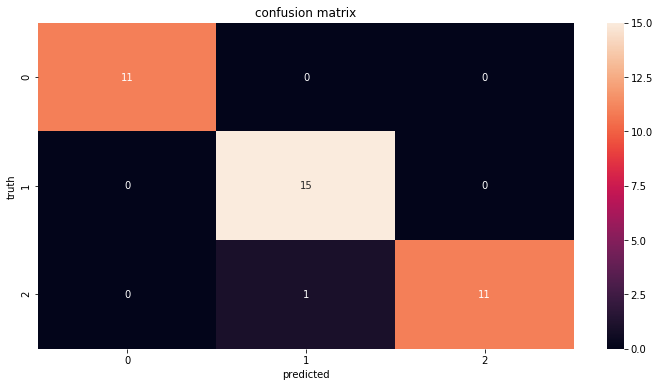

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title('confusion matrix')

In [28]:
import joblib
joblib.dump(model, 'E://models//iris_prediction_nn')

['E://models//iris_prediction_nn']